In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os


In [8]:
custom_colors = ['#38028F', '#8F0202', '#8F0244', '#02448F', '#028F4A', '#8F6A02', "#00B1B8"]

In [4]:
data_path = '/home/paridhi/AARC-Lab/Projects/carla_simulations/research/Final_Reports/sim_data_FsIdmTesting_nV_8_ref25_f50.csv'

In [2]:
def load_data(data_path):
    data = pd.read_csv(data_path)
    return data


In [5]:
data = load_data(data_path)
data.head()

,Unnamed: 0,time,name,x,y,z,speed,acc,gap,ref_velocity,rel_velocity
0,0,0.02,leader,9500.000000,0.000000e+00,0.388445,0.392000,0.0,NaN,NaN,NaN
1,1,0.02,car1,9508.599609,0.000000e+00,0.394767,1.093477,0.0,3.999611,0.0,0.0
2,2,0.02,car2,9517.200195,3.552714e-17,0.403767,1.094165,0.0,4.000591,0.0,0.0
3,3,0.02,car3,9525.799805,3.552714e-17,0.422134,1.093489,0.0,3.999628,0.0,0.0
4,4,0.02,car4,9534.400391,3.552714e-17,0.444148,1.094182,0.0,4.000615,0.0,0.0


In [ ]:
def plot_gap_vs_time(data):
        df = data
        
        followers = df[df['name'].str.contains('car')]
        plt.figure(figsize=(11, 6.5))
        follower_groupby = followers.groupby('name')
        for idx, (name, group) in enumerate(follower_groupby):
            color = custom_colors[idx % len(custom_colors)]
            plt.plot(group['time'], group['gap'], label=fr'$\Delta x_{{{idx+1}}}(t)$', color=color, linewidth=1)

        # Add vertical dashed line at switching time
        switch_time = 120  # seconds
        plt.axvline(x=switch_time, color='purple', linestyle='--', linewidth=1)

        # Add text annotations
        plt.text(switch_time - 65, plt.ylim()[1] * 0.85, "Manual Driving",
                 fontsize=22, ha='center', va='top', color='black')
        plt.text(switch_time + 85, plt.ylim()[1] * 0.85, "Mixed Autonomy",
                 fontsize=22, ha='center', va='top', color='black')
        plt.text(switch_time + 6, plt.ylim()[1] * 0.2, "FS Activation", rotation=90, color='purple',fontsize=18)



        plt.xlabel(r"\textbf{Time (s)}",fontsize=18)
        plt.ylabel(r"\textbf{Space Headway (m)}",fontsize=18)
        plt.title(r"\textbf{Space Headway ($\Delta x$) Between Successive Vehicles Over Time}",fontsize=24)
        plt.xlim(0,300)
        plt.ylim(0,100)
        plt.grid(True)
        plt.legend(loc='lower right',ncol=2,fontsize=18)
        plt.xticks(fontsize=24)
        plt.yticks(fontsize=24)
        # plt.savefig(f'Final_Reports/SpaceHeadway{self.controller_type}_nV_{self.num_vehicle+2}_ref{self.reference_speed}_f{self.sampling_frequency}.pdf',dpi=300,format='pdf',bbox_inches='tight')
        plt.show()

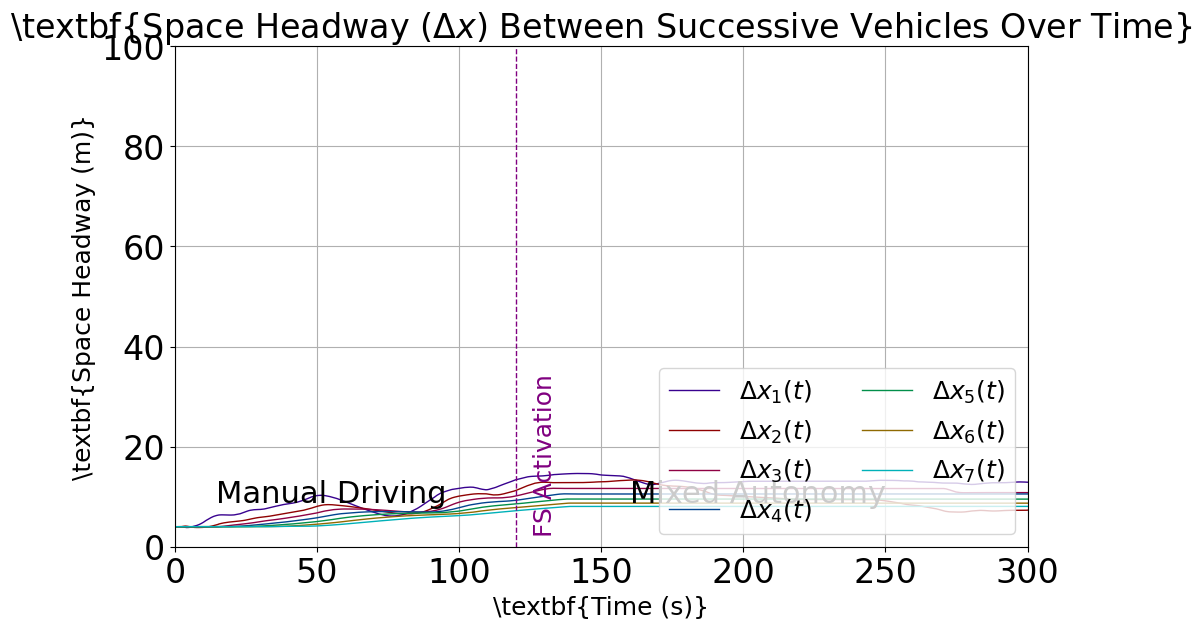

In [10]:
plot_gap_vs_time(data)

In [15]:
data[data['name']=='car1']['gap'].max()

np.float64(15.26741828918457)

In [23]:
data['gap'].max()

np.float64(15.26741828918457)

In [29]:
data[['name','x','gap']].iloc[20000:20040]

,name,x,gap
20000,leader,9478.811523,NaN
20001,car1,9493.637695,10.226173
20002,car2,9506.307617,8.069929
20003,car3,9517.679688,6.772070
20004,car4,9528.067383,5.787695
20005,car5,9537.705078,5.037695
20006,car6,9546.814453,4.509375
20007,car7,9555.573242,4.158789
20008,leader,9478.798828,NaN
20009,car1,9493.625000,10.226173
